<a href="https://colab.research.google.com/github/alchemy110/DeepLearning_Practical/blob/main/multiclass_CNN(opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN in FashionMNIST dataset(opt)

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, Model
from tensorflow.keras import Input
from tensorflow.keras.utils  import to_categorical
import numpy as np
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

## Data Preparation

In [4]:
%%capture
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_labels.shape

(60000,)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = train_images.reshape(60000, 28, 28)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.reshape(10000, 28, 28)
test_images = test_images.astype("float32") / 255.0

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_labels.shape

(10000,)

## Model Design

In [14]:
inp = Input(shape=(28, 28, 1))
# change 64 to 32 &change kernel_regularizer to 0.001
x = layers.Conv2D(32,(3, 3), padding='same')(inp)
# add batch normalizaation layer
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
# change to conv 64
x = layers.Conv2D(64,(3 ,3), activation='relu', padding='same')(x)
# add batch normalizaation layer
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
# add dropout 0.5
x= layers.Dropout(0.4)(x)
x = layers.Dense(64, activation='relu',kernel_regularizer =l2(0.002))(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        1849

## Train CNN model

In [15]:
from tensorflow.keras import optimizers
from  tensorflow.keras.optimizers  import  Adam
model_cnn.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [16]:
history = model_cnn.fit (train_images, train_labels,
                         epochs=30, batch_size=512,
                         validation_data=(test_images, test_labels))

Epoch 1/30
118/118 [==============================] - 14s 20ms/step - loss: 0.8168 - accuracy: 0.7910 - val_loss: 2.4039 - val_accuracy: 0.7243
Epoch 2/30
118/118 [==============================] - 2s 16ms/step - loss: 0.5149 - accuracy: 0.8721 - val_loss: 2.0833 - val_accuracy: 0.8116
Epoch 3/30
118/118 [==============================] - 2s 16ms/step - loss: 0.4256 - accuracy: 0.8896 - val_loss: 1.2544 - val_accuracy: 0.8329
Epoch 4/30
118/118 [==============================] - 2s 17ms/step - loss: 0.3695 - accuracy: 0.9023 - val_loss: 0.5553 - val_accuracy: 0.8840
Epoch 5/30
118/118 [==============================] - 2s 18ms/step - loss: 0.3321 - accuracy: 0.9092 - val_loss: 0.4296 - val_accuracy: 0.8646
Epoch 6/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3064 - accuracy: 0.9134 - val_loss: 0.3491 - val_accuracy: 0.8981
Epoch 7/30
118/118 [==============================] - 2s 16ms/step - loss: 0.2887 - accuracy: 0.9187 - val_loss: 0.3065 - val_accuracy: 0.911

## Evaluation of CNN model

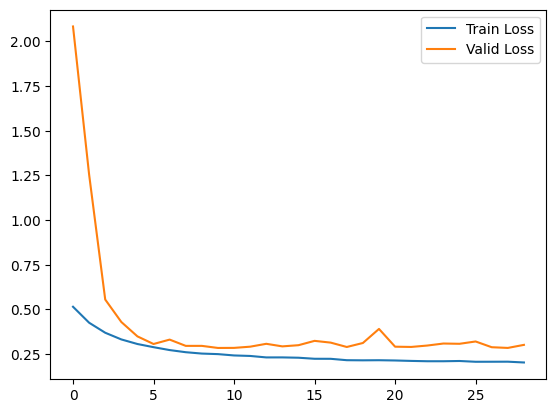

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Valid Loss')
plt.legend()

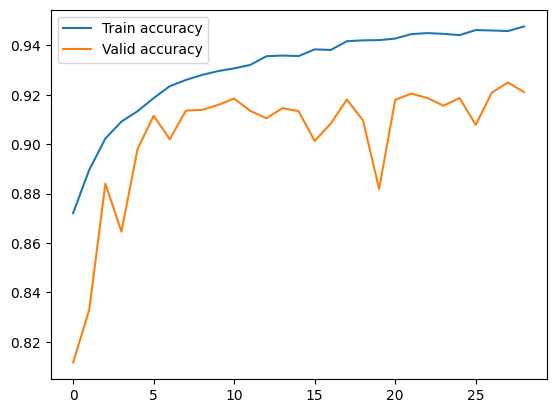

In [18]:
plt.plot(history.history['accuracy'][1:], label='Train accuracy')
plt.plot(history.history['val_accuracy'][1:], label='Valid accuracy')
plt.legend()

## Prediction

In [21]:
model_cnn.evaluate(test_images, test_labels)



313/313 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9211


[0.30164027214050293, 0.9211000204086304]

# ostad nesbat be model shoma az lahaz loss , accuracy 4.5% behbood peda kard

In [19]:
pred_cnn = model_cnn.predict(test_images)

313/313 [==============================] - 1s 2ms/step


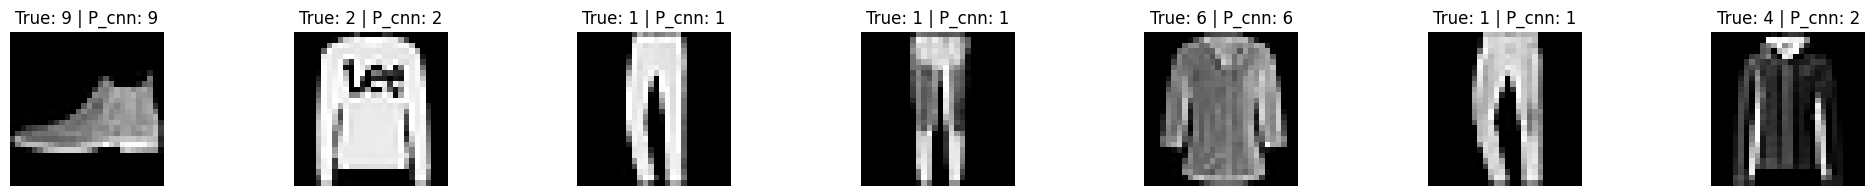

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(25,2))
for i in range(len(axes)):
  axes[i].imshow(test_images[i], cmap='gray')
  axes[i].set_axis_off()

  title = f'True: {test_labels[i]} | P_cnn: {np.argmax(pred_cnn[i])}'
  axes[i].set_title(title)
